Redes neurais artificiais
=========================



## Introdução



Nossa classe `Valor` já faz tudo que precisamos para usarmos ela como suporte para construirmos uma rede neural. Neste notebook iremos construir uma rede neural por partes, primeiramente criando um neurônio artificial, depois uma camada de neurônios e, por fim, uma rede neural multicamadas.



## Objetivo



Criar uma rede neural artificial usando Python.



## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

## Código e discussão



Uma informação x1, x2 e x3 com pesos w1, w2 e w3 associados, chegam em um neurônio que contenha a função g(x) e o viés b, retornando um valor x4.
x1, x2 e x3 não são parte do neurônio, pois chegam nele. O pesso associado em x4 e o próprio x4 também não. Logo associado ao neurônio temos os pesos w1 w2 e w3, a função de ativação g(x) e o viés b. O que é associado ao neurônio é o que está definido na classe, os valores que chegam no neurônio são inputs na classe, e x4 é o que a classe retorna.

### O neurônio artificial



Vamos construir um neurônio artificial. Como iremos ter vários neurônios em uma rede neural, podemos construir uma classe que servirá de receita para criar esses neurônios. Lembre-se que um neurônio artificial recebe informação de sinapses artificiais ponderadas, soma estas informações, adiciona um viés à esta soma, aplica uma função de ativação e, finalmente, passa a informação adiante.



In [2]:
class Neuronio:
    def __init__(self, num_dados_entrada): # É preciso informar quantos dados o neurônio recebe
        pesos = []

        for _ in range(num_dados_entrada): # Cada vez que o for roda, ele atribui um peso a um dado de entrada.
            peso = Valor(random.uniform(-1, 1)) # Instancia de valor que atribui um peso, dado pelo random.uniform, onde qualquer numero onde -1 e 1 tem a mesma chance de ser sorteado.
            pesos.append(peso)

        self.pesos = pesos # Capturamos os pesos gerados
        self.vies = Valor(random.uniform(-1, 1)) # Viés também é uma instância de valor aleatorizada entre -1 e 1.
        
# Cada vez que geramos um neurônio ele será diferente dos demais, pois terão pesos e viés diferentes

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado." # Mensagem que aparece no erro
        
        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p
            
        soma = soma + self.vies
        dado_de_saida = soma.sig() # Aplicando a sigmoide na "coisa"
        return dado_de_saida

Vamos fazer um teste simples do nosso neurônio artificial.



In [3]:
dados_de_entrada = [2.5, 4.25]

meu_neuronio = Neuronio(len(dados_de_entrada)) # Um neurônio / uma camada (Perceptron)

print(meu_neuronio(dados_de_entrada))

Valor(data=0.9954401031570047)


### A camada de neurônios



Uma rede neural artificial com apenas um neurônio é um modelo relativamente simples. As redes neurais artificias costumam ser mais interessantes com mais neurônios. O motivo para isso é que com mais neurônios nós conseguimos identificar padrões mais complexos nos dados na tentativa de induzir um modelo preditivo melhor.

Uma estrutura de organização de neurônios artificiais são as `camadas de neurônios`. Uma camada de neurônio é um conjunto de neurônios onde cada neurônio é independente (tem seu próprio conjunto de pesos e viés), porém recebe a mesma informação. A quantidade de informação recebida estará representada no argumento `num_dados_entrada` abaixo. Assim como o neurônio artificial, uma camada de neurônios será modelada usando uma classe.



**No perceptron, uma informação qualquer x1 é atribuida a todos os neurônios de uma camada. Se temos mais uma informação x2, esta também será passada para todos os neurônios da camada.**

**Porém, cada neurônio receberá a mesma informação mas terá um peso atribuido para cada um destes neurônios.**

In [4]:
class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios): # Um range em num_neuronios pois queremos criar n números de neurônios, criando a camada
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios # A minha camada tem o self.neuronios

    def __call__(self, x): # Faz com que a classe seja executável. Executar um neurônio é receber um dado e propagá-lo, resultando em x4.
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = [] # É a informação que sai da camada, após ter sido propagada pelos neurônios

        for neuronio in self.neuronios:
            informacao = neuronio(x) # A informação a ser propagada é executar o neurônio
            saidas.append(informacao)

        if len(saidas) == 1: # No caso de ser um valor único, tiramos ele da lista.
            return saidas[0]
        else:
            return saidas

Vamos fazer um teste simples da nossa camada de neurônios artificiais.



In [9]:
dados_de_entrada = [2.5, 4.25]
num_neuronios = 3

minha_camada = Camada(len(dados_de_entrada), num_neuronios)

print(minha_camada(dados_de_entrada))

[Valor(data=0.019065203272844517), Valor(data=0.2641216622844343), Valor(data=0.14528603537203064)]


### A rede neural Multilayer Perceptron (MLP)



Uma rede neural artificial composta de uma ou mais camadas ocultas de neurônios (isto é, camadas que não sejam camadas de entrada ou camadas de saída) é chamada de Multilayer Perceptron ou simplesmente `MLP`.

A informação em uma rede MLP flui da esquerda para a direita, iniciando na camada de entrada, passando por todas as camadas ocultas (uma a uma, na ordem) e saindo na camada de saída. A informação em uma MLP nunca retorna, apenas segue em frente. Por conta disso, MLPs também são chamadas de `feedforward networks`, ou seja, redes neurais que sempre propagam &ldquo;para frente&rdquo; a informação. Existem outros tipos de redes neurais que não são `feedforward`, porém estas não serão vistas neste curso.

Como você provavelmente já estava esperando, usaremos uma classe para servir como receita para criar nossas redes MLP.



**Primeira camada: Dados de entrada
<br>
Camadas seguintes (n camadas): Camadas Ocultas conténdo n neurônios
<br>
Última camada: Camada de saída, contendo 1 neurônio**

In [10]:
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x

Vamos fazer um teste simples da nossa rede MLP.



In [19]:
dados_de_entrada = [2.5, 4.25]
num_neuronios_por_camada = [3, 2, 1]

minha_mlp = MLP(len(dados_de_entrada), num_neuronios_por_camada)

resultado = minha_mlp(dados_de_entrada)

print(resultado)

Valor(data=0.3608071508976898)


Observe que nosso `resultado` é uma instância da classe `Valor`! O que nós podemos fazer com instâncias desta classe? Sim, podemos computar o gradiente local usando nosso algoritmo de `autograd` e plotar o grafo computacional!!



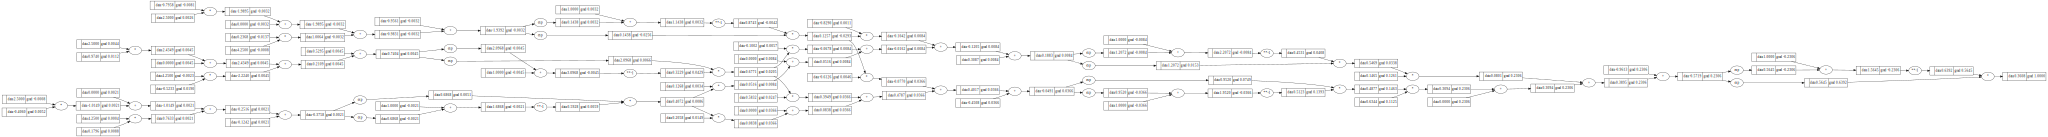

In [20]:
resultado.propagar_tudo()
grafo = plota_grafo(resultado)

# para salvar o grafo
grafo.render("rede_neural", format="png")

grafo

## Conclusão

Neste experimento, trabalhamos com a construção de uma rede neural artificial a partir de uma classe Valor construída nos experimentos anteriores.
Em redes neurais, os neurônios da `camada oculta` recebem dados que tiveram um peso atribuído nas sinapses, soma os valores recebidos, somam um viés `b` e o aplicam em uma `função de ativação`. Logo, foram aplicadas estas operações e atribuições de peso na nossa classe `Valor`, e então finalmente os dados foram propagados.

## Playground

